<a href="https://colab.research.google.com/github/Pavanm132004/Machine-Learning-Projects/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
#convert date as a DateTime object

df['date']=pd.to_datetime(df['date'])
df.set_index(df['date'], inplace=True)
df = df.drop('date', axis=1)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.info()
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
#convert date as a DateTime object

df_test['date']=pd.to_datetime(df_test['date'])
df_test.set_index(df_test['date'], inplace=True)
df_test = df_test.drop('date', axis=1)
df_test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meantemp  114 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [ ]:

# For df
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'], inplace=True)
df = df.drop(columns=['date', 'humidity', 'wind_speed', 'meanpressure'])


# For df_test
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
df_test.set_index(df_test['date'], inplace=True)
df_test = df_test.drop(columns=['date', 'humidity', 'wind_speed', 'meanpressure'])

df.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [ ]:
#check if it is a time serie by looking at the autocorrelation

print(df['meantemp'].autocorr())

0.974067478267388


In [ ]:
df_ = df.copy(deep=True)
df_['Yesterday']=df_['meantemp'].shift()
df_.dropna(inplace=True)
df_.head()

,meantemp,Yesterday
date,,
2013-01-02,7.400000,10.000000
2013-01-03,7.166667,7.400000
2013-01-04,8.666667,7.166667
2013-01-05,6.000000,8.666667
2013-01-06,7.000000,6.000000


In [ ]:
df_test = df_test.copy(deep=True)
df_test['Yesterday']=df_test['meantemp'].shift()
df_test.dropna(inplace=True)
df_test.head()

,meantemp,Yesterday
date,,
2017-01-02,18.500000,15.913043
2017-01-03,17.111111,18.500000
2017-01-04,18.700000,17.111111
2017-01-05,18.388889,18.700000
2017-01-06,19.318182,18.388889


In [ ]:
y_train = df_['meantemp']
X_train = df_['Yesterday']
X_test = df_test['Yesterday']
y_test = df_test['meantemp']

In [ ]:
X_train.values

array([10.        ,  7.4       ,  7.16666667, ..., 15.23809524,
       14.0952381 , 15.05263158])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train.values.reshape(-1, 1),y_train)
y_pred = lr_model.predict(X_test.values.reshape(-1, 1))

In [ ]:
df_result_test = pd.DataFrame(y_test)
df_result_test['predicted'] = y_pred

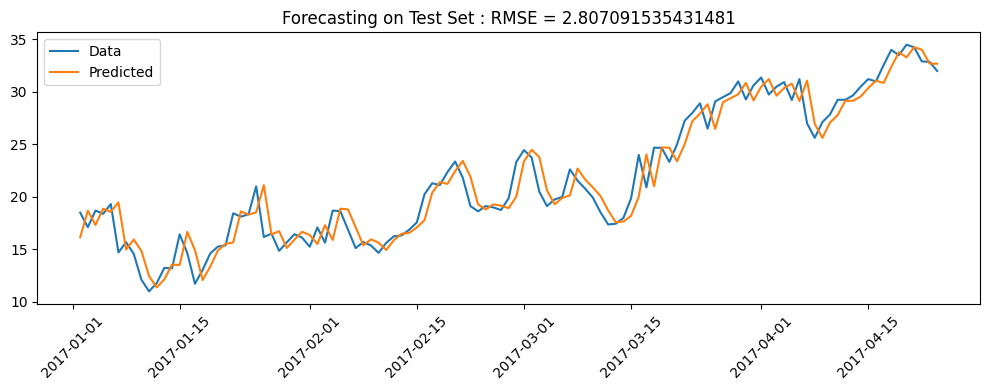

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
plt.plot(df_test['meantemp'],label='Data')
plt.plot(df_result_test['predicted'],label='Predicted')
plt.xticks(rotation=45)
plt.title(f"Forecasting on Test Set : RMSE = {mean_squared_error(y_pred,y_test)}")
plt.legend()
plt.tight_layout()

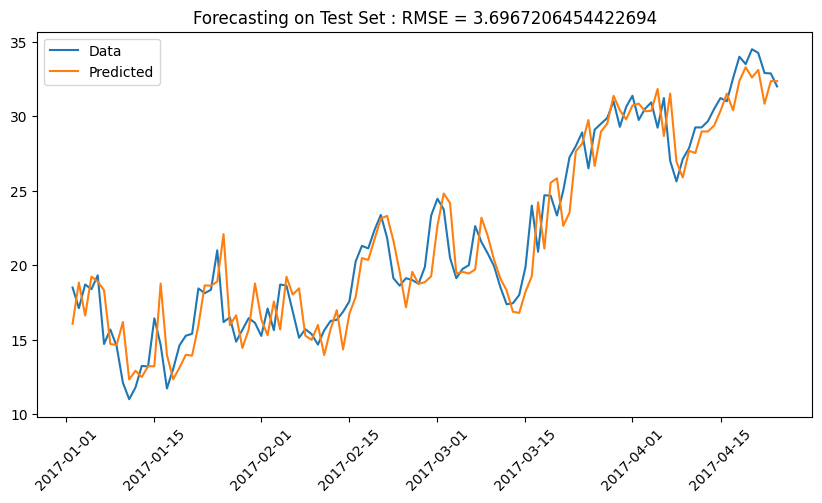

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=500)
rf_model.fit(X_train.values.reshape(-1,1), y_train)


yp = rf_model.predict(X_test.values.reshape(-1,1))
df_result_test = pd.DataFrame(y_test)
df_result_test['predicted'] = yp

plt.figure(figsize=(10,5))
plt.plot(df_result_test['meantemp'],label='Data')
plt.plot(df_result_test['predicted'],label='Predicted')
plt.xticks(rotation=45)
plt.title(f"Forecasting on Test Set : RMSE = {mean_squared_error(yp,y_test)}")
plt.legend();